In [7]:
import numpy as np
import pandas as pd
import json
import pickle
import math

from qiskit.visualization import plot_histogram 

In [2]:
def load_file(n_qubits, device_type, number): 
    
    file_path = './' + device_type + '_' + str(n_qubits) +  'qubits_ideal_' + str(number) + '.json'
    file_path_1 = './' + device_type + '_' + str(n_qubits) + 'qubits_obs_' + str(number) + '.json'
    
    Y = 0
    with open(file_path, "r") as json_file:
        Y = json.load(json_file)
    X = 0
    with open(file_path_1, "r") as json_file:
        X = json.load(json_file)

    return X, Y

def transform(n_data, times, x, n_qubits):

    for i in range(times):
        for j in range(n_data):
            for k in range(2**n_qubits):
                bit_i = str(bin(k)[2:]).zfill(n_qubits)
                if bit_i not in x[i][j]:
                    x[i][j][bit_i] = 0
                if i == 0 and j == 0:
                    x[i][j][bit_i] = [x[i][j][bit_i]]

    df = pd.DataFrame(x[0][0])

    for i in range(1, n_data ):
        df = pd.concat([df, pd.DataFrame([x[0][i]])], ignore_index = True)
    for i in range(1, times):
        for j in range(0, n_data):
            df = pd.concat([df, pd.DataFrame([x[i][j]])], ignore_index = True)
    col = []
    for i in range(2**n_qubits):
        bit_i = str(bin(i)[2:]).zfill(n_qubits)
        col.append(bit_i)
    df = df[col] 
    
    return df

def load_data(n_qubits, n_data, times, device_type, number):

    X = [0 for i in range(len(n_qubits))]
    Y = [0 for i in range(len(n_qubits))]

    for i in range(len(n_qubits)):
        X[i], Y[i] = load_file(n_qubits[i], device_type, number)
        X[i] = transform(n_data, times[i], X[i], n_qubits[i])
        Y[i] = transform(n_data, times[i], Y[i], n_qubits[i])

    return X, Y

def LI_QREM(n_qubits, times, n_data, device_type, number, X):
        
    file_path_2 = './' + device_type + '_' + str(n_qubits) + 'qubits_meas_' + str(number) + '.p'
    
    with open(file_path_2, 'rb') as file:
        meas = pickle.load(file)
        
    LI = []
    for i in range(times):
        miti = []
        for j in range(n_data):
            row_dict = X.iloc[(n_data * i) + j].to_dict()
            miti.append(meas.filter.apply(row_dict))
        LI.append(miti)
    
    LI = transform(n_data, times, LI, n_qubits)

    return LI


In [40]:
#n_qubits = [5]
#n_data = 300 
#times = [15]
#device_type = "ibm_geneva"
#number = 0

n_qubits = [5]
n_data = 900 
times = [5]
device_type = 'ibmq_toronto'
number = 0

X, Y= load_data(n_qubits, n_data, times, device_type, number)
LI = LI_QREM(n_qubits[0], times[0], n_data, device_type, 0, X[0])


In [ ]:
# 아래는 transfer
#another_device_type = "ibmq_toronto"
#another_number = 0

#X, Y= load_data(n_qubits, n_data, times, device_type, number)
#LI = LI_QREM(n_qubits[0], times[0], n_data, another_device_type, another_number, X[0])

In [41]:
X[0].to_csv(device_type + '_' + str(n_qubits[0]) +  'qubits_obs_' + str(number) + '.csv', index=False, header=True)
Y[0].to_csv(device_type + '_' + str(n_qubits[0]) +  'qubits_ideal_' + str(number) + '.csv', index=False, header=True)
LI.to_csv(device_type + '_' + str(n_qubits[0]) +  'qubits_miti_' + str(number) + '.csv', index=False, header=True)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [42]:
X = pd.read_csv(device_type + '_' + str(n_qubits[0]) +  'qubits_obs_' + str(number) + '.csv')
Y = pd.read_csv(device_type + '_' + str(n_qubits[0]) +  'qubits_ideal_' + str(number) + '.csv')
LI = pd.read_csv(device_type + '_' + str(n_qubits[0]) +  'qubits_miti_' + str(number) + '.csv')


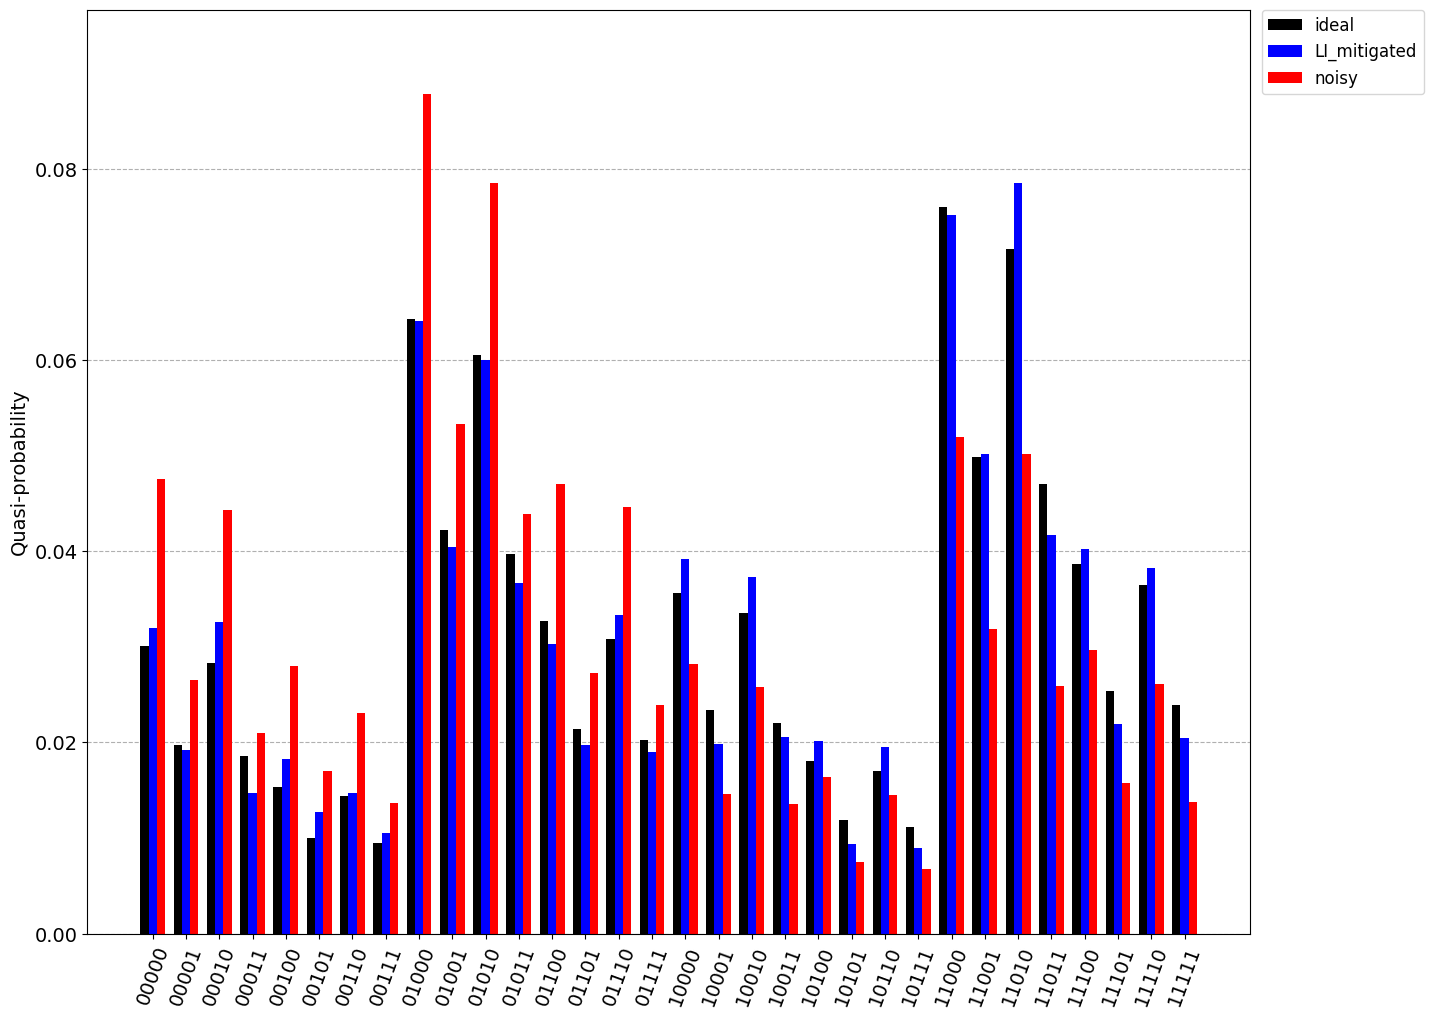

In [43]:
plot_histogram([Y.iloc[0].to_dict(), LI.iloc[0].to_dict(), X.iloc[0].to_dict()], legend=['ideal', 'LI_mitigated', 'noisy'], bar_labels = False, figsize = (15, 12), color=['black', 'blue', 'red'])

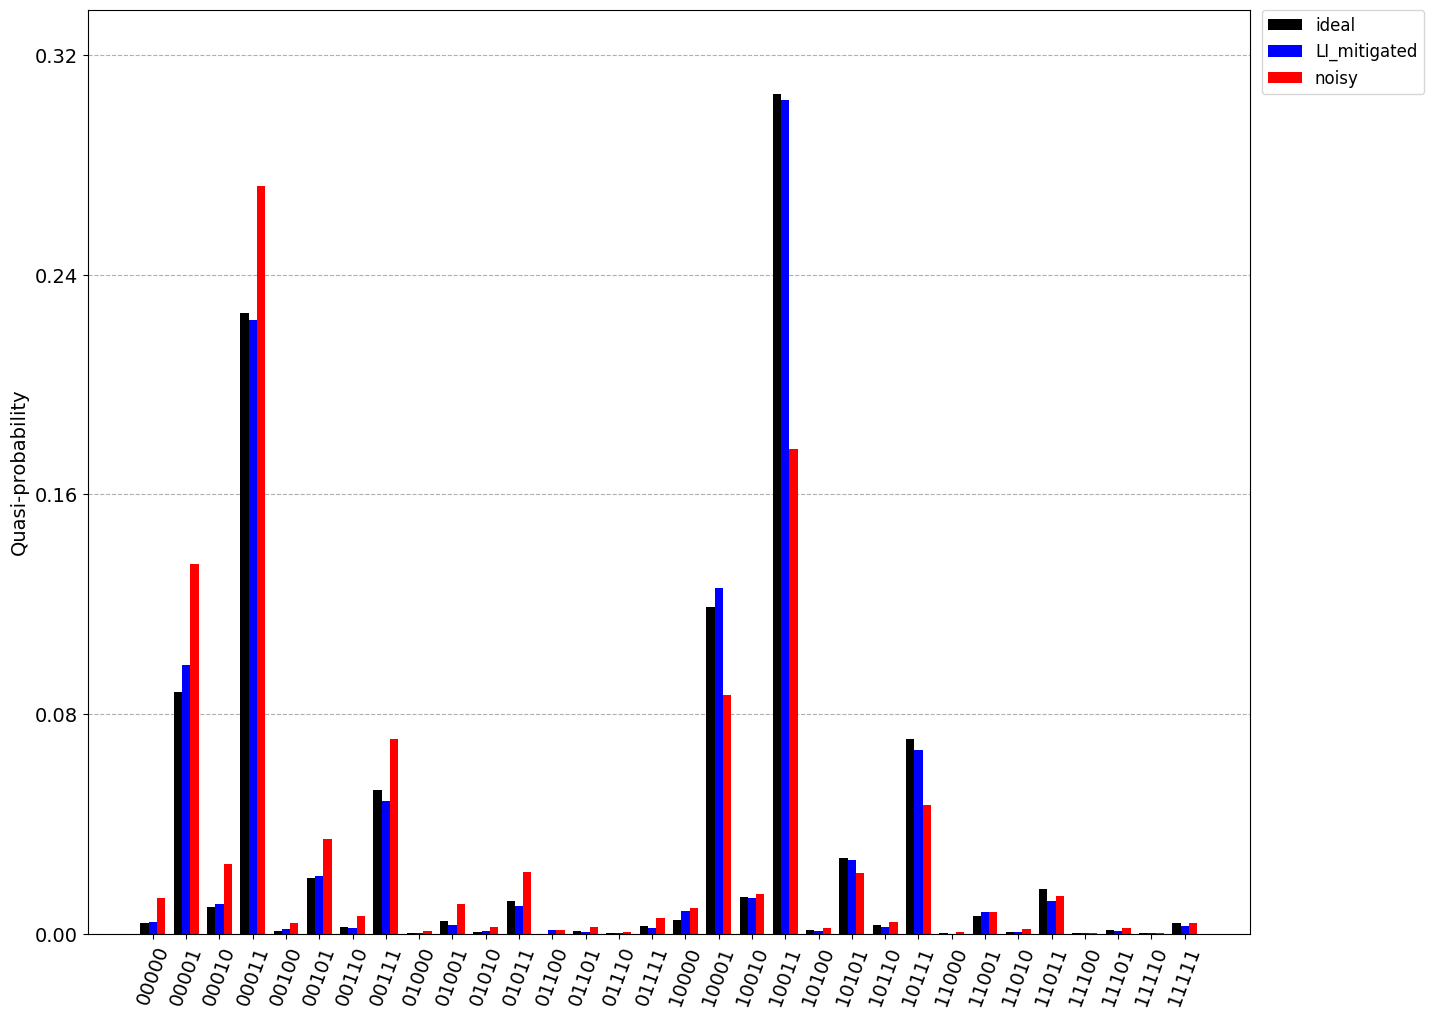

In [44]:
plot_histogram([Y.iloc[10].to_dict(), LI.iloc[10].to_dict(), X.iloc[10].to_dict()], legend=['ideal', 'LI_mitigated', 'noisy'], bar_labels = False, figsize = (15, 12), color=['black', 'blue', 'red'])